# Operating System : Experiments on Cache Strategies

## <u>Creation of useful functions :</u>

In [1]:
from memory import Memory
from cache import CyclicCache, LRUCache
import utilities

### Function to set up memory and caches before experiment :

In [161]:
# Create some memory of size 10.000 :
data = utilities.sample_data(size = 10000)

def setup(lru_size, cyc_size, data = data):
    global mem, lru, cyc
    # Create implementations of caching with the given data :
    mem = Memory(data)
    lru = LRUCache(data, size = lru_size)
    cyc = CyclicCache(data, size = cyc_size)

### Function to print performances of each cache strategies during experiment :

In [162]:
def print_performances(mem_hit_count, lru_hit_count, cyc_hit_count):
    hit_counter = {'Mem': mem_hit_count, 'LRU': lru_hit_count, 'Cyc': cyc_hit_count}
    hit_counter = dict(sorted(hit_counter.items(), key=lambda item: item[1]))
    output = "Hit Performances: "
    for performer in hit_counter:
        output += f"{performer} ({hit_counter[performer]}) > "
    print(output[:-2])
    

### Function to launch an experiment and display results :

In [163]:
def experiment(test_data):
    global mem, lru, cyc

    for datum in test_data:
        mem.lookup(datum)
    print(f"Mem: {mem.get_memory_hit_count()} hits")


    for datum in test_data:
        lru.lookup(datum)
    print(f"LRU: {lru.get_memory_hit_count()} hits")

    for datum in test_data:
        cyc.lookup(datum)
    print(f"Cyc: {cyc.get_memory_hit_count()} hits")

    print_performances(mem.get_memory_hit_count(), lru.get_memory_hit_count(), cyc.get_memory_hit_count())


### Function to visualise and display results as a bar plot :

Please note that we will use *maptplotlib* library to display our results as graphs, as well as *numpy* library within our graphs.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def visualise_results(labels, lru, cyc, mem):
    fig = plt.subplots(figsize = (12,8))
    
    barWidth = 0.4
    br1 = np.arange(3)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    plt.bar(br1, [lru[0], cyc[0], mem[0]], color ='sandybrown', width = barWidth, edgecolor = 'black' , label = labels[0])
    plt.bar(br2, [lru[1], cyc[1], mem[1]], color ='peachpuff', width = barWidth, edgecolor = 'black' , label = labels[1])
    plt.title("Experimental results on caching strategies")
    plt.xlabel('Strategies', fontweight ='bold', fontsize = 15)
    plt.ylabel('Hit Count (Fraction)', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth/2 for r in range(3)], ['LRU', 'Cyc', 'Memory'])
    
    plt.legend(loc="lower right")
    plt.show()

### Functions to create ***random, temporal or spatial*** data :

Please note that we will use the *random* library in order to generate random values towards our experiments.

In [165]:
import random

# Function to create random data :
def create_random_data(size, variance = None):
    if variance == None: 
        variance = size
    return [random.randint(0, variance-1) for i in range(size)]

# Function to create spatial data :
def create_spatial_data(size, variance):
    test_data = []
    while len(test_data) < size:
        l = random.randint(0, variance)
        n = random.randint(0,3)
        p = random.randint(0,3)
        q = random.randint(0,3)
        if n == p:
            test_data.append(l)
            test_data.append(l+1)
            test_data.append(l+2)
            test_data.append(l+3)
        if n == q:
            test_data.append(l)
            test_data.append(l)
        else:
            test_data.append(l)
    return test_data[:size]

# Function to create temporal data :
def create_temporal_data(size, variance):
    test_data = []
    while len(test_data) < size:
        l = random.randint(0,variance)
        n = random.randint(0,3)
        p = random.randint(0,3)
        q = random.randint(0,3)
        if n == p:
            test_data.append(l)
            test_data.append(l)
        if n == q:
            test_data.append(l)
            test_data.append(l)
        test_data.append(l)
    return test_data[:size]

# <u>Section I : Data Size</u>

In this section, we will experiment on different **data sizes**, and test the performance of various cache strategies against it.

## Experiment 1 : Small data size

### Purpose
We are going to test the performance of various cache strategies against **<u>small</u> data size** and **small cache size** to see how efficient caching strategies are with such parameters.

In [199]:
# We setup our Memory and Caches of size 4 :
setup(lru_size = 4, cyc_size = 4)

# We then create a test_data set of size 13 :
test_data = create_random_data(size = 13)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 13 hits
LRU: 9 hits
Cyc: 9 hits
Hit Performances: LRU (9) > Cyc (9) > Mem (13) 


### Observation

When looking at our experiment results, we can see that both **LRU and Cyc are equivalent** when test against **<u>small</u> data size** and **small cache size**.
<br>However, they both perform better than **Memory** by **reducing the hits from 13 to 9**.


## Experiment 2 : Big data size

### Purpose
We will now test the performance of various cache strategies against **<u>big</u> data size** and *(still)* **small cache size**, to see how a change of data size would affect our caching strategies results.

In [221]:
# We setup our Memory and Caches of size 4 :
setup(lru_size = 4, cyc_size = 4)

# We then create a random test_data set of size 10000 :
test_data = create_random_data(size = 10000)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 9996 hits
Cyc: 9996 hits
Hit Performances: LRU (9996) > Cyc (9996) > Mem (10000) 


### Observation

When looking at our experiment results, we can see that both **LRU and Cyc are *still* equivalent** when test against **<u>big</u> data size** and **small cache size**.
<br>Here, they both *again* perform better than **Memory** by **reducing the hits from 10000 to 9996**.

## Visualisation

We will now make a graph using the results of both our experiments, in order to raise a conclusion by comparing and interprating these.

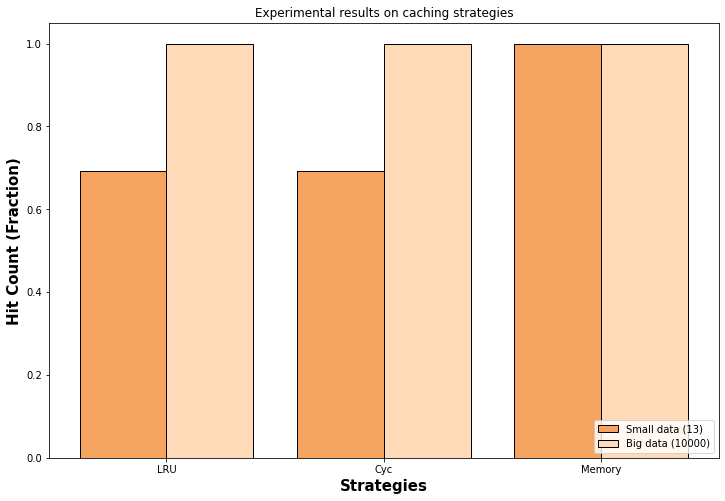

In [20]:
# Create a bar plot visualisation of our experiments result :
visualise_results(["Small data (13)", "Big data (10000)"], [9/13, 9996/10000], [9/13, 9996/10000], [13/13, 10000/10000])

## Conclusion

Desipite the fact that LRU and Cyc both **equivalently** perform better than **Memory** with big and small data size, we can see that the Hit Rate of our cache strategies **is not proportionnal** to data size. 
<br> In both experiment, we have been able to reduce the hits by 4 with our caching strategies. So it seems like being **contant** (9/13 and 9996/10000) and therefore, more efficient on **small data**.

# <u>Section II : Cache Size</u>

In this second section, we will now experiment on different **cache sizes**, and test the performance of various cache strategies against it.

From now, we will be working with **big data** size since we have previously conclude that data size wouldn't affect our experiment because of proportion, and as such small size would not be representative of a realistic system.
<br> Moreover, holding big data size may help considering a **data variance** in the future.

## Experiment 3 : Small cache

### Purpose
Here, we will first test the performance of various cache strategies against **big data size** and **<u>small</u> cache size**, to see how this last parameter could affect our caching efficiency.
<br> This experiment is in fact *the same* as the previous, but we will have a closer eye on **the affect of the cache size** this time.

In [169]:
# We setup our Memory and Caches of size 4 :
setup(lru_size = 4, cyc_size = 4)

# We then create a random test_data set of size 10000 :
test_data = create_random_data(size = 10000)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 9997 hits
Cyc: 9997 hits
Hit Performances: LRU (9997) > Cyc (9997) > Mem (10000) 


### Observation & Interpretation

Obviously, the number from this experiment are very similar to the previous one. **LRU and Cyc are *once again* equivalent** when test against **big data size** and **<u>small</u> cache size**. However, we can see that the hits are slightly higher *(+1)* than the previous experiment, showing that hit rates are never fixed, but will always be varying according to the random parameter.

<br> On the other hand, we are now able to explain the reason why there is no difference in the efficiency of both cache strategies: it is not because they perform the same, but because a matching from a **4 sized cache** and a **10.000 sized data** has a very low probability to occur, especially since we are working with **randomized data**.
<br> It can be shown by the difference in the Hits: although they both perform slightly better than **Memory**, they are only **reducing the hits from 10000 to 9997**.

## Experiment 4 : Big Cache

### Purpose
Secondly, we will test the performance of various cache strategies against **big data size** and **<u>big</u> cache size**, to conclude on the impact that the **cache size** would have towards our caching strategies.

In [226]:
# We setup our Memory and Caches of size 100 :
setup(lru_size = 100, cyc_size = 100)

# We then create a random test_data set of size 10000 :
test_data = create_random_data(size = 10000)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 9899 hits
Cyc: 9900 hits
Hit Performances: LRU (9899) > Cyc (9900) > Mem (10000) 


### Observation

In this second experiment, we see that **LRU** performs *just* **slightly better** than **Cyc**, when test against **big data size** and **<u>big</u> cache size**.
<br> However, unlike the previous experiment, we see a bigger gap between **LRU/Cyc** and **Memory** Hit counts, which is synonym of a higher **cache hit rate**.
<br> This experiment ranks the **LRU** as the most efficient with 9899 hits, slightly above **Cyc** with 9900 hits. They obviously both perform better than **Memory** with 10000 hits.

## Visualisation

We will now make a graph using the results of both our experiments, in order to raise a conclusion by comparing and interprating these.

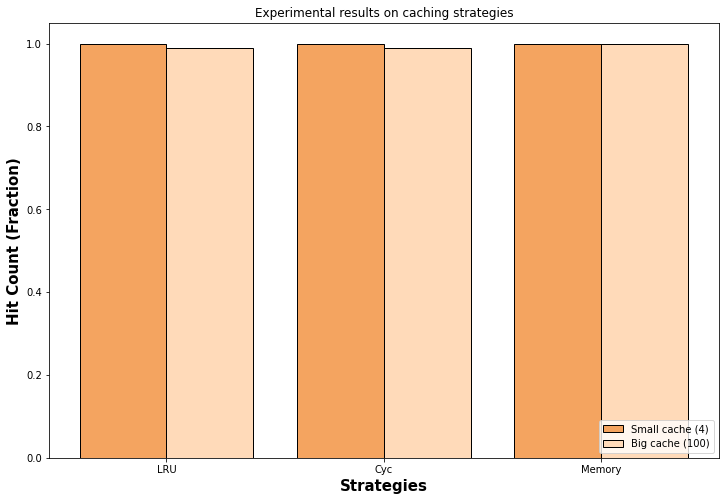

In [21]:
# Create a bar plot visualisation of our experiments result :
visualise_results(["Small cache (4)", "Big cache (100)"], [9997/10000, 9899/10000], [9997/10000, 9900/10000], [10000/10000, 10000/10000])

## Conclusion

Both experiment have shown that **LRU** and **Cyc** both work more efficiently when being assigned to **<u>big</u> cache size**, with a slight advantage for **LRU**.
<br> This can be explain as the second experiment acts as the opposite of the previous one. Having a **bigger cache size** *(100)* allows the strategies to apply themselves with a **higer hiting probability**, and thus, more **efficiently**.
<br> Obviously, we will be able to store more different data in Cache, and therefore have a higher probability of matching a memory access.

<br> We can conclude that the **hit rate** of a cache will increase **proportionally with his size**. In which case, **LRU** may perform slightly better than **Cyc**.

# <u>Section III : Data Variance</u>

Now that we know that the Hit Rate of our cache strategies **is not proportional** to its **data size**, and that **cache efficiency** increase **proportionally with his size**, we will try to see how the data itself can affect the cache efficiency.
<br> For that, we will make changes to the **data variance**, in order to simulate **'locality of reference'** and see what would happen with data that may have a lower range.

## Experiment 5 : Low Variance

We will assume the previous experiment (n°4) as testing the performance of various cache strategies against **high variance**, since we made the variance equal to the size of our data by default *(10000)*, in our 'create_random_data' function.

### Purpose
Now, we are going to test the performance of various cache strategies against **low variance** (lower variability in the data, higher locality).
<br> For this we will simply change the variance to **300** *(was 10000 in previous experiment)* to simulate a more realistic system with **locality of reference**.


In [237]:
# We setup our Memory and Caches of size 100 :
setup(lru_size = 100, cyc_size = 100)

# We then create a random test_data set of size 10000 and variance 300 :
test_data = create_random_data(size = 10000, variance = 300)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 6678 hits
Cyc: 6694 hits
Hit Performances: LRU (6678) > Cyc (6694) > Mem (10000) 


### Observation

In this experiment, we see that **LRU** performs even better than **Cyc**, when test against **<u>low</u> data variance**.
<br> Moreover, we see a **<u>way bigger gap</u>** between **LRU/Cyc** and **Memory** Hit counts compared to our previous experiment *(from 9899 to 6678 for LRU: over 30% improvement)*.
<br> This experiment ranks the **LRU** as the most efficient with **6678 hits**, slightly above **Cyc** with **6694** hits. They both perform way better than **Memory** with 10000 hits.

## Visualisation

We will now make a graph using the results of both our previous experiments, in order to raise a conclusion by comparing and interprating these.

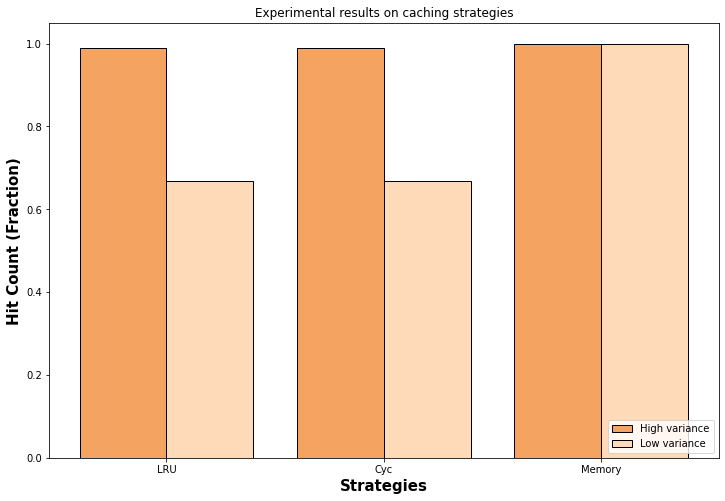

In [22]:
# Create a bar plot visualisation of our experiments result :
visualise_results(["High variance", "Low variance"], [9899/10000, 6678/10000], [9900/10000, 6694/10000], [10000/10000, 10000/10000])

## Conclusion

We have seen that **data variance** has an important impact towards our cache strategies **hit rates**, following that: the lower the data range is, the more locality of references is simulated by the repetition of test data.
<br> Therefore, we can conclude that the **hit rate** of a cache will increase **accordingly to the data variance**. In which case, **LRU** may perform better than **Cyc**.

# <u>Section IV : Spatial and Temporal Locality</u>

This last section will deepen our experiments around **locality of reference**, seeking the performance of various cache strategies against it.
<br> Thereby, we will test the tendency of a processor to access the same set of memory locations repetitively over a short period of time. For this, we will consider two types of reference locality: **<u>temporal and spatial locality</u>**.

## Experiment 6 : Temporal Locality

### Purpose
Now, we are going to test the performance of various cache strategies against **Temporal Locality**.
<br> As temporal locality is based on repeatedly referenced resources, we will use a data set with repeated values by reusing data within a relatively small gap of time, in our case: time is associated to our data list indexes.

In [190]:
# We setup our Memory and Caches of size 4 :
setup(lru_size = 4, cyc_size = 4)

# We then create a temporal test_data set of size 10000 and variance 10 :
test_data = create_temporal_data(size = 10000, variance = 10)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 3155 hits
Cyc: 3172 hits
Hit Performances: LRU (3155) > Cyc (3172) > Mem (10000) 


### Observation

In this experiment, we see that **LRU** performs *slightly* better than **Cyc**, when test against **<u>Temporal</u> Locality**.
<br> Moreover, **temporal locality** has **<u>**hugely** increased the gap</u>** between **LRU/Cyc** and **Memory** Hit counts, compared to our previous experiment *(from 6678 to 3155 for LRU: over 50% improvement)*.
<br> This experiment ranks the **LRU** as the most efficient with **3155 hits**, slightly above **Cyc** with **3172 hits**. They both perform way better than **Memory** with **10000** hits.

### Analysis

Temporal locality states that if a particular memory location is referenced, then it is likely that the same location will be referenced again in the near future.

<br> In fact, since we know that there is a **temporal proximity** between adjacent references to the same memory location, and that portions of code are stored adjacently in memory, it is very likely that a code will re-execute in a similar order of locations in memory, and thus make use of temporal proximity.
<br> In this case storing the referenced data in cache may lead towards reducing the latency of subsequent references.

<br> This can explain the reason why, despite which strategy between LRU or Cyc is used, **temporal locality will perform well better** than any other method previously analyzed.


## Experiment 7 : Spatial Locality

### Purpose
Now, we are going to test the performance of various cache strategies against **Spatial Locality**.
<br> As spatial locality refers to the use of data elements within relatively close storage locations, we will use a data set where the likelihood of referencing a specific data is higher if one near has just been referenced. In our case, we will now use our **data values** *(previously <u>indexes</u> for temporal locality)* as a way to group data in the described way.

In [241]:
# We setup our Memory and Caches of size 4 :
setup(lru_size = 4, cyc_size = 4)

# We then create a spatial test_data set of size 10000 and variance 10:
test_data = create_spatial_data(size = 10000, variance = 10)

# Finally, we experiment on our test_data set :
experiment(test_data = test_data)

Mem: 10000 hits
LRU: 5682 hits
Cyc: 5969 hits
Hit Performances: LRU (5682) > Cyc (5969) > Mem (10000) 


### Observation

In this experiment, we see that **LRU** performs **way** better than **Cyc**, when test against **<u>Spatial</u> Locality**.
<br> Moreover, **spatial locality** has **<u>increased the gap</u>** between **LRU/Cyc** and **Memory** Hit counts, compared to *Experiment n°5 (from 6678 to 5682 for LRU: over 15% improvement)*.
<br> This experiment ranks the **LRU** as the **way** most efficient with **5682 hits**, slightly above **Cyc** with **5969** hits. They both perform way better than **Memory** with **10000** hits.

### Analysis

**LRU** keeps the things that were most recently **used** in memory. Therefore, with spatial locality where data is most likely referenced by nearby groups of which have been recently **refered**, LRU may be particulary efficient.
<br> It seems to fit a real life intepretation: if a process is frequently accessing a page, you really don't want it to be paged to Memory.

On the other hand, **Cyc** keeps the things that were most recently **added**, which is time-related and not reference-related as spatial locality is doing. Therefore, Cyc may be a worse fit to spatial locality.

We can state that LRU is, in general, more efficient when working with spatial locality, because LRU is much more likely to keep the frequently-used items in memory, and thereby goes along with spatial locality better than **Cyc** does.

## Visualisation

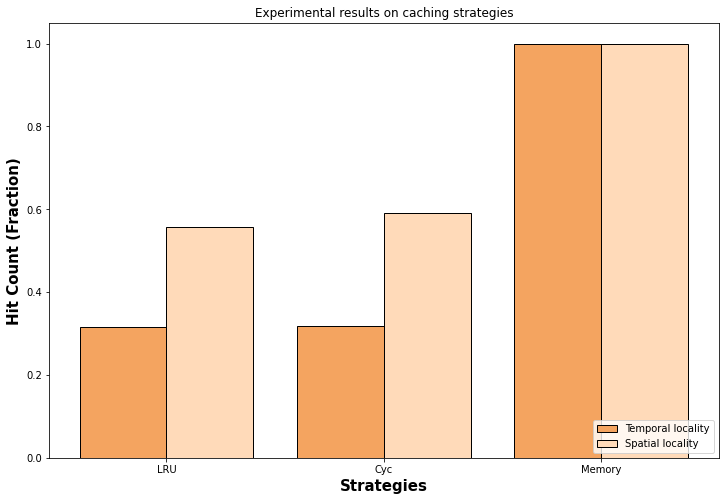

In [23]:
# Create a bar plot visualisation of our experiments result :
visualise_results(["Temporal locality", "Spatial locality"], [3166/10000, 5562/10000], [3173/10000, 5914/10000], [10000/10000, 10000/10000])

## Conclusion

We can conclude that although **temporal locality** has an overall better performance when tested against our caching strategies *(over 50% improvements towards Low Variance, and over 45% towards spatial locality)*; **spacial locality** will show a clear margin between **LRU** and **Cyc**, with **LRU** overperforming **Cyc** by around 5% which represents a very important difference for realistic big systems.

# <u>Final Conclusion :</u>

Our seven experiments have helped us conclude on multiple points :
<li> The <b>hit rate</b> of our cache strategies <b>is not proportionnal</b> to data size. Using our caching strategies with size 4, we have been able to reduce the hits by 4 when assigned to both 13 and 10000 data size <i>(Experiments 1 & 2)</i>.
<li> The <b>hit rate</b> of a cache strategy will increase <b>proportionally with its size</b>. Indeed, being able to store more different data in Cache results in a higher probability of matching a memory access, as shown by comparing cache sizes of 4 and 100, resulting in a decrease in the hits from 9997 to 9899 for LRU <i>(Experiments 3 & 4)</i>.
<li> The <b>hit rate</b> of a cache will increase <b>accordingly to the data variance</b>. Since <i>the lower the variance is, the most data will be made out of similar values</i>, and therefore simulate some <b>locality of reference</b>. As an example, we have seen the numbers of memory hits decrease from 9899 to 6678 in an experiment against LRU <i>(Experiments 4 & 5)</i>.

<br> Following those experiments, we have tested our caching strategies against two efficient types of reference locality: 
<li> <b>Temporal locality</b>, simulated using a data set with repeated values, has shown <b>the most</b> overall efficient caching method. We have noted an improvement of 50% towards low variance, <b>but</b> with no big difference between LRU and Cyc in the performance <i>(Experiment 6)</i>.
<li> <b>Spatial locality</b>, simulated by grouping data based on their value, on the other hand has performed less efficiently overall. We have only noted an improvement of 15% towards low variance <i>(Experiment 5)</i>, however, LRU overperformed Cyc by 5% using this caching method, which represents an important margin in real systems <i>(Experiment 7)</i>.

<br> Finally, it seems like both LRU and Cyc have very similar performances, with only LRU showing an important margin when used against <b>Spatial locality</b>.
<br> However, we can say that <b>reference locality</b> does impact performances importantly, especially with <b>Temporal locality</b> winning by a fair margin in some cases.
<br> Even if both types of <b>reference locality</b> result as being the most efficients (the point of using cache being to use locality to optimise memory access), each of them are very efficient in their own way, and there is no apparent better one to all situations: <i>each system would perform differently with one or the other</i>.

<br> To conclude with, we have seen improvements as high as 70% between hit rates with and without caches. It has been made clear that caching is a very efficient way of gaining some performance, with LRU overperforming Cyclic in most cases. However, it is an all other question to ask which caching strategy should be used based on a particular system, even though we can comfortably state that caching will increase a system performances consistently.